* Creator: Chike Uduku
* Created: 03/28/2019
* Revision: 1.0

SUMMARY OF OBSERVATIONS:
* Capomulin appears to be the most effective drug in shrinking tumor size as tumor volume for mice being treated with this drug shrank by about 19%. Other drugs observed did not domuch to slow down the growth of tumors.

* Observing changes in metastatic sites, Ketaprill appears to correlate closely with the placebo drug over 45 days, with metastatic sites for mice being treated with ketaprill actually showing a more aggressive rate of increase for the last 5 days of the 45. This observation combined with the fact that mice being treated with Ketaprill had the highest percebtage increase in tumor size (about 57%) would suggest that ketaprill is the least effective drug.

* As is expected, mice being treated with Capomulin had the highest survival rate, with only 16% of these cases being terminal. This is reamrkably low when compared to the terminal rates of the other drugs observed.

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_drug_data_to_load)
ct_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
ct_df["Mouse ID"].count()
mouse_ct_df = pd.merge(ct_df,mouse_df, on = "Mouse ID",how = "outer")

# Display the data table for preview
mouse_ct_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mouse_ct_grouping = mouse_ct_df.groupby(["Drug","Timepoint"])
# Convert to DataFrame
meanTumor_Ser = mouse_ct_grouping["Tumor Volume (mm3)"].mean()
meanTumor_df = pd.DataFrame(meanTumor_Ser)
# Preview DataFrame
meanTumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorSem_Ser = mouse_ct_grouping["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
tumorSem_df = pd.DataFrame(tumorSem_Ser)
# Preview DataFrame
tumorSem_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
meanReformat_df = meanTumor_Ser.unstack("Drug")
# Preview that Reformatting worked
meanReformat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [63]:
#Reformat standard error data frame
semReformat_df = tumorSem_Ser.unstack("Drug")
semReformat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


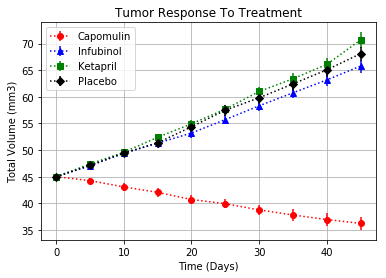

In [100]:
# Generate the Plot (with Error Bars)
plt.errorbar(meanReformat_df.index,meanReformat_df["Capomulin"],semReformat_df["Capomulin"],marker ='o',label ="Capomulin", color ='red',linestyle = ":")
plt.errorbar(meanReformat_df.index,meanReformat_df["Infubinol"],semReformat_df["Capomulin"],marker ='^',label = "Infubinol",color ='blue',linestyle = ":")
plt.errorbar(meanReformat_df.index,meanReformat_df["Ketapril"],semReformat_df["Ketapril"],marker ='s',label = "Ketapril",color ='green',linestyle = ":")
plt.errorbar(meanReformat_df.index,meanReformat_df["Placebo"],semReformat_df["Placebo"],marker ='D',label = "Placebo", color ='black',linestyle = ":")
plt.title("Tumor Response To Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Total Volume (mm3)")
plt.legend(loc = "best")
plt.grid()
# Save the Figure
plt.savefig("Outputs/Tumor_Response.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [64]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_df = mouse_ct_df[["Timepoint","Metastatic Sites","Drug"]] #get sub dataframe 
met_group = met_df.groupby(["Drug","Timepoint"]) #group by Drug and Timepoint
met_Ser = met_group["Metastatic Sites"].mean() #Series object of means
# Convert to DataFrame
metMean_df = pd.DataFrame(met_Ser)
# Preview DataFrame
metMean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semMet_Ser  = met_group["Metastatic Sites"].sem()
# Convert to DataFrame
semMet_df = pd.DataFrame(semMet_Ser)
# Preview DataFrame
semMet_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metMeanReform_df = met_Ser.unstack("Drug")
# Preview that Reformatting worked
metMeanReform_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [65]:
#Reformat standard error data frame
metSemReform_df = semMet_Ser.unstack("Drug")
metSemReform_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


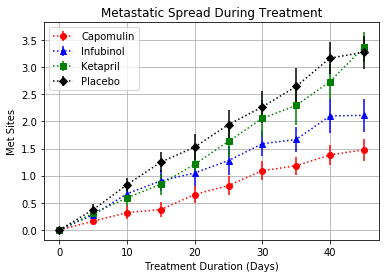

In [99]:
# Generate the Plot (with Error Bars)
plt.errorbar(metMeanReform_df.index,metMeanReform_df["Capomulin"],metSemReform_df["Capomulin"],marker ='o',label ="Capomulin", color ='red',linestyle = ":")
plt.errorbar(metMeanReform_df.index,metMeanReform_df["Infubinol"],metSemReform_df["Infubinol"],marker ='^',label = "Infubinol",color ='blue',linestyle = ":")
plt.errorbar(metMeanReform_df.index,metMeanReform_df["Ketapril"],metSemReform_df["Ketapril"],marker ='s',label = "Ketapril",color ='green',linestyle = ":")
plt.errorbar(metMeanReform_df.index,metMeanReform_df["Placebo"],metSemReform_df["Placebo"],marker ='D',label = "Placebo", color ='black',linestyle = ":")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
plt.legend(loc = "best")
plt.grid()
# Save the Figure
plt.savefig("Outputs/Metastatic_Spread_Treatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [102]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
miceCount_df = mouse_ct_df[["Mouse ID","Drug","Timepoint"]] #get sub data frame of Mouse ID, Drug, Timepoint
miceCountGroup = miceCount_df.groupby(["Drug","Timepoint"]) #group by Drug and Timepoint
mice_ser = miceCountGroup["Mouse ID"].count() #Series object of mice count
# Convert to DataFrame
mice_df = pd.DataFrame(mice_ser)
# Preview DataFrame
mice_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [67]:
# Minor Data Munging to Re-Format the Data Frames
miceReformat_df = mice_ser.unstack("Drug")
# Preview the Data Frame
miceReformat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


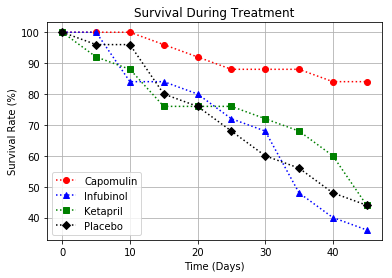

In [16]:
# Generate the Plot (Accounting for percentages)
plt.plot(miceReformat_df.index,miceReformat_df["Capomulin"]/25 * 100,marker ='o',label ="Capomulin", color ='red',linestyle = ":")
plt.plot(miceReformat_df.index,miceReformat_df["Infubinol"]/25 * 100,marker ='^',label ="Infubinol", color ='blue',linestyle = ":")
plt.plot(miceReformat_df.index,miceReformat_df["Ketapril"]/25 * 100,marker ='s',label ="Ketapril", color ='green',linestyle = ":")
plt.plot(miceReformat_df.index,miceReformat_df["Placebo"]/25 * 100,marker ='D',label ="Placebo", color ='black',linestyle = ":")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc = "best")
plt.grid()
# Save the Figure
plt.savefig("Outputs/Survival_During_Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [68]:
# Calculate the percent changes for each drug
pChanges = [((meanTumor_df.loc[(aDrug,45)]["Tumor Volume (mm3)"] - meanTumor_df.loc[(aDrug,0)]["Tumor Volume (mm3)"]) / \
            meanTumor_df.loc[(aDrug,0)]["Tumor Volume (mm3)"]* 100) for aDrug in meanTumor_df.index.levels[0] ]

pChanges_tuple = list(zip(meanTumor_df.index.levels[0],pChanges))
pChanges_tuple


[('Capomulin', -19.47530266666667),
 ('Ceftamin', 42.51649185811964),
 ('Infubinol', 46.123471728395046),
 ('Ketapril', 57.02879468484847),
 ('Naftisol', 53.92334713675214),
 ('Placebo', 51.297960484848495),
 ('Propriva', 47.24117486349207),
 ('Ramicane', -22.32090046222224),
 ('Stelasyn', 52.08513429090911),
 ('Zoniferol', 46.57975086507933)]

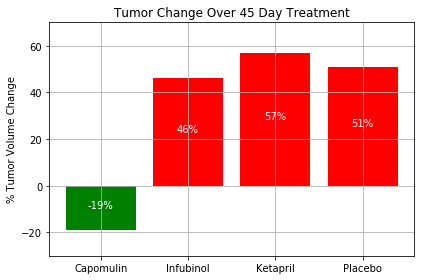

In [96]:
myLabels = ["Capomulin","Infubinol","Ketapril","Placebo"]
percents = [int(y) for x, y in pChanges_tuple if x in myLabels] #grab percent change values for specified drugs
myRect = plt.bar(myLabels,percents, color = ['green','red','red','red'])#bar graph
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.ylim(-30,70) #Set y limit
plt.grid()
plt.tight_layout()

#Put text on each bar showing % change 
for i in range(len(myRect)):
    h = myRect[i].get_height()
    w = myRect[i].get_width()
    plt.text(myRect[i].get_x() + w/2,h/2,str(percents[i])+"%", ha ='center', color = 'white')

# Save the Figure
plt.savefig("Outputs/Tumor_Change.png")

# Show the Figure
plt.show()